# **Importing the libraries**

In [1]:
import numpy as np 
  
import pandas as pd 
  
import matplotlib.pyplot as plt 

import decimal 

# **Importing the datasets**

In [2]:
train_df = pd.read_csv("/home/somya/Downloads/mnist_train_small.csv")
test_df = pd.read_csv("/home/somya/Downloads/mnist_test.csv")

In [3]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Arranging the training dataset**

In [5]:
x1 = train_df.drop(['6'], axis = 1).values

x0_train = np.ones((np.shape(x1)[0],1))

x_train = np.hstack((x0_train,x1))

In [6]:
print(x_train)
print(x_train.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(19999, 785)


In [7]:
y1 = train_df['6']
y_train = y1.to_numpy()
y_train = np.vstack(y_train)

In [8]:
print(y_train)
print(y_train.shape)

[[5]
 [7]
 [9]
 ...
 [2]
 [9]
 [5]]
(19999, 1)


# **Arranging the test dataset**

In [9]:
x2 = test_df.drop(index = 1942 , columns ='7').values

x0_test = np.ones((np.shape(x2)[0],1))

x_test = np.hstack((x0_test,x2))

In [10]:
print(x_test)
print(x_test.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(1942, 785)


In [11]:
y2 = test_df['7']
y_test = y2.drop(index = 1942).values
y_test = np.vstack(y_test)

In [12]:
print(y_test)
print(y_test.shape)

[[2]
 [1]
 [0]
 ...
 [5]
 [7]
 [8]]
(1942, 1)


# **Visualising the data**

In [13]:
digit = x1[0]
digit_image = digit.reshape(28,28)

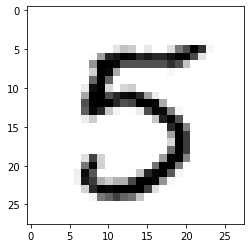

In [14]:
plt.imshow(digit_image, cmap = plt.cm.binary)

# **Implementation of model**

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
y_enc = np.zeros([y_train.shape[0], np.unique(y_train).shape[0]])

for i in range(np.unique(y_train).shape[0]):
    
    for j in range(0, len(y_enc)):
        
        if (y_train[j] == np.unique(y_train)[i]):
            
            y_enc[j, i] = 1
            
print(y_enc)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
y_enc.shape

(19999, 10)

In [18]:
theta = np.zeros((x_train.shape[1], y_enc.shape[1]))
theta.shape

(785, 10)

In [19]:
def hypothesis(theta, x):
    
    z = np.dot(x, theta)
    
    sigmoid = np.array(1/(1 + (np.exp(-z))))                
        
    return sigmoid

In [20]:
def cost_function(x, y, theta):
        
    y1 = -y * np.log(hypothesis(theta, x))
        
    y0 = -(1 - y) * np.log(1 - hypothesis(theta, x))
        
    return np.sum(y1 + y0) / x.shape[0]

In [21]:
def gradient_descent(x, y, theta, learning_rate, iterations):

    for i in range(iterations):
        
        for j in range(theta.shape[1]):
            
            h = hypothesis(theta[:,j], x)
                
            theta[:,j] = theta[:,j] - (learning_rate/x.shape[0]) * np.dot(x.T,(h-y[:,j]))

    return theta

In [22]:
x_train = x_train/255
x_test = x_test/255

theta = gradient_descent(x_train, y_enc, theta,0.95,900)

In [23]:
print(theta)
theta.shape

[[-0.01262956 -0.00330029 -0.01572885 ... -0.00549683 -0.05339802
  -0.02490309]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


(785, 10)

In [24]:
theta1 = pd.DataFrame(theta)
theta1

,0,1,2,3,4,5,6,7,8,9
0,-0.01263,-0.003300,-0.015729,-0.021045,-0.009473,-0.002742,-0.012965,-0.005497,-0.053398,-0.024903
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
780,-0.01139,-0.000032,-0.000142,-0.000168,-0.001875,-0.000413,-0.000155,0.008959,-0.000789,-0.002404
781,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
782,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
783,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
y_enc = np.zeros([y_test.shape[0], np.unique(y_test).shape[0]])

for i in range(np.unique(y_test).shape[0]):
    
    for j in range(0, len(y_enc)):
        
        if (y_test[j] == np.unique(y_test)[i]):
            
            y_enc[j, i] = 1
            
print(y_enc)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [26]:
output = np.empty((y_enc.shape[1], y_enc.shape[0]))

for i in range(y_enc.shape[1]):

    #h = hypothesis(theta[:,i], x_train)
    h = hypothesis(theta[:,i], x_test)
    
    output[i] = h

In [27]:
print(output)
output.shape

[[8.20269615e-03 1.12396192e-04 9.74198515e-01 ... 9.99109552e-01
  8.83315363e-03 6.84702066e-04]
 [1.92287051e-05 9.73482424e-01 2.07581434e-11 ... 2.73968918e-07
  5.75953037e-06 5.16709359e-03]
 [9.75050774e-01 4.61162063e-02 7.41063517e-04 ... 2.18909006e-05
  3.09347145e-02 5.95933635e-02]
 ...
 [3.05002827e-10 2.51496004e-02 2.46977602e-04 ... 9.62469885e-05
  3.21978764e-01 2.03291236e-03]
 [7.20199197e-03 2.81408349e-02 1.05181879e-04 ... 2.42161641e-01
  1.96203584e-01 5.85600279e-01]
 [5.14983214e-08 8.40596108e-03 3.57780823e-05 ... 1.76184947e-03
  1.21610167e-02 1.16485373e-03]]


(10, 1942)

In [28]:
output1 = pd.DataFrame(output)
output1

,0,1,2,3,4,5,6,7,8,9,...,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941
0,8.202696e-03,0.000112,9.741985e-01,0.002886,0.000013,0.000063,0.000002,9.837819e-04,4.475924e-05,9.601843e-01,...,0.000022,6.581381e-07,0.003999,1.237885e-06,5.651738e-06,0.019500,0.000004,9.991096e-01,8.833154e-03,0.000685
1,1.922871e-05,0.973482,2.075814e-11,0.000009,0.984033,0.000016,0.004211,7.584725e-06,1.478761e-08,2.254396e-08,...,0.000049,9.931269e-01,0.000220,5.094812e-08,2.303213e-04,0.000001,0.979974,2.739689e-07,5.759530e-06,0.005167
2,9.750508e-01,0.046116,7.410635e-04,0.010319,0.012384,0.000002,0.002625,1.352400e-03,1.815102e-07,3.199552e-02,...,0.211663,5.515190e-03,0.010756,9.736624e-01,3.069669e-02,0.498093,0.003367,2.189090e-05,3.093471e-02,0.059593
3,4.453402e-02,0.025168,2.793374e-05,0.000073,0.025981,0.002637,0.016882,2.707196e-09,5.891777e-07,3.350268e-03,...,0.016505,2.490637e-02,0.004147,6.396192e-03,1.047330e-03,0.000336,0.008867,2.984962e-06,1.197563e-07,0.001822
4,1.820189e-09,0.005756,2.485174e-08,0.961634,0.001159,0.986013,0.014169,2.385000e-02,1.697959e-02,3.130398e-05,...,0.003914,1.273655e-04,0.000394,6.241281e-08,1.544863e-05,0.224178,0.000137,9.260857e-02,1.566109e-01,0.293118
5,6.657599e-02,0.018503,7.153062e-04,0.000218,0.002446,0.127507,0.225368,4.054804e-03,7.084246e-05,1.416636e-02,...,0.000050,3.781211e-03,0.004104,6.192793e-07,3.048532e-03,0.010092,0.028054,9.935436e-01,4.388276e-03,0.234164
6,7.882652e-02,0.026076,2.084157e-03,0.011582,0.001017,0.000979,0.001596,5.232665e-01,2.250363e-05,1.775177e-04,...,0.000281,2.764739e-03,0.000005,1.809272e-03,9.875289e-01,0.779904,0.005672,5.352345e-04,1.290452e-04,0.026844
7,3.050028e-10,0.025150,2.469776e-04,0.012152,0.039363,0.003081,0.003206,6.038393e-08,5.128390e-02,8.464864e-07,...,0.865445,2.700563e-03,0.993244,1.037274e-05,1.065011e-08,0.002456,0.001616,9.624699e-05,3.219788e-01,0.002033
8,7.201992e-03,0.028141,1.051819e-04,0.026897,0.033115,0.683356,0.021619,9.979788e-05,9.535062e-03,3.810547e-02,...,0.035521,1.176240e-02,0.023966,4.060410e-04,5.510259e-02,0.022335,0.108691,2.421616e-01,1.962036e-01,0.585600
9,5.149832e-08,0.008406,3.577808e-05,0.043869,0.013346,0.022728,0.930512,1.455392e-04,5.946501e-01,3.137885e-08,...,0.094520,1.576180e-02,0.022248,1.826198e-07,2.666099e-04,0.064858,0.020185,1.761849e-03,1.216102e-02,0.001165


In [29]:
#cost_function(x_train, y_enc, theta)
cost_function(x_test, y_enc, theta)

0.9064897398705416

In [30]:
#Predicted labels
y_pred = np.empty((y_enc.shape[0], 1))

for q in range(0, y_enc.shape[0]):
    
    for p in range(0, y_enc.shape[1]):
        
        if (output[p,q] == np.max(output[:,q])):
            
            y_pred[q] = p
            

In [31]:
y_pred

array([[2.],
       [1.],
       [0.],
       ...,
       [0.],
       [7.],
       [8.]])

In [32]:
#l = np.hstack((y_train, y_pred))
l = np.hstack((y_test, y_pred))

result = pd.DataFrame(l, columns = ["Actual", "Predicted"])

print(result.head(20))

    Actual  Predicted
0      2.0        2.0
1      1.0        1.0
2      0.0        0.0
3      4.0        4.0
4      1.0        1.0
5      4.0        4.0
6      9.0        9.0
7      5.0        6.0
8      9.0        9.0
9      0.0        0.0
10     6.0        6.0
11     9.0        9.0
12     0.0        0.0
13     1.0        1.0
14     5.0        5.0
15     9.0        9.0
16     7.0        7.0
17     3.0        3.0
18     4.0        4.0
19     9.0        9.0


In [33]:
from sklearn.metrics import accuracy_score

#print ("Accuracy of the model is: ", accuracy_score(y_pred, y_train))
print ("Accuracy of the model is: ", accuracy_score(y_pred, y_test))

Accuracy of the model is:  0.8836251287332647
